<a href="https://colab.research.google.com/github/GowriShankarG/MTech_AIML/blob/master/ML_AIMLCZG565_Assignment_1and2_FinalVersion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction

A heart attack, medically known as a myocardial infarction, occurs when blood flow to the heart is severely reduced or blocked, typically due to a buildup of fat, cholesterol, and other substances forming a plaque in the coronary arteries. This blockage can lead to the formation of a blood clot, which disrupts the oxygen supply to the heart muscle, potentially causing damage or death to the affected heart tissue.

This analysis leverages data-driven approaches to identify patterns and correlations that contribute to heart attack risks. By applying machine learning algorithms, healthcare providers can estimate the probability of a heart attack for a specific individual and provide personalized recommendations for preventive measures.

The goal is to enable early detection and proactive management of heart disease, ultimately reducing the prevalence of heart attacks and improving patient outcomes. This problem is crucial for advancing preventive cardiology and empowering individuals to take control of their cardiovascular health.


The dataset is Heart_Attack_Analysis_Data.csv.
This dataset contains data about some hundreds of patients mentioning Age, Sex, Exercise Include Angia(1=YES, 0=NO), Chest Pain Type(Value 1: typical angina, Value2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic), ECG Results, Blood Pressure, Cholesterol, Blood Sugar, Family History (Number of persons affected in the family), Maximum Heart Rate, Target -0=LESS CHANCE , 1= MORE CHANCE


## 1. Import Libraries/Dataset

a. Download the dataset.
b. Import the required libraries

In [8]:
!pip install pydot

In [9]:
# b. import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from sklearn.model_selection import train_test_split # for split the training and test data

In [10]:
# read the file
# Assuming the data file in the same directory of the .ipynb file, if not, please change the path
HAA_data=pd.read_csv("/content/drive/MyDrive/Heart_Attack_Analysis_Data.csv")
#HAA_data=pd.read_csv("Heart_Attack_Analysis_Data.csv")
HAA_data.head(20)

,Age,Sex,CP_Type,BloodPressure,Cholestrol,BloodSugar,ECG,MaxHeartRate,ExerciseAngia,FamilyHistory,Target
0,63,1,3,145,233,1,0,150,0,2,1
1,37,1,2,130,250,0,1,187,0,1,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,1,1
4,57,0,0,120,354,0,1,163,1,0,1
5,57,1,0,140,192,0,1,148,0,0,1
6,56,0,1,140,294,0,0,153,0,0,1
7,44,1,1,120,263,0,1,173,0,0,1
8,52,1,2,172,199,1,1,162,0,0,1
9,57,1,2,150,168,0,1,174,0,1,1


## 2. Data Visualization and Exploration [1M]

a.     Print at least 5 rows for sanity check to identify all the features present in the dataset and if the target matches with them.

b.     Print the description and shape of the dataset.

c.     Provide appropriate visualization to get an insight about the dataset.

In [11]:
# a. Print at least 5 rows for sanity check to identify all the features present in the dataset and if the target matches with them.

HAA_data.head(5)



,Age,Sex,CP_Type,BloodPressure,Cholestrol,BloodSugar,ECG,MaxHeartRate,ExerciseAngia,FamilyHistory,Target
0,63,1,3,145,233,1,0,150,0,2,1
1,37,1,2,130,250,0,1,187,0,1,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,1,1
4,57,0,0,120,354,0,1,163,1,0,1


Observation : all the features present in the dataset and if the target matches with them

In [12]:
# b. Print the description and shape of the dataset.
HAA_data.describe()


,Age,Sex,CP_Type,BloodPressure,Cholestrol,BloodSugar,ECG,MaxHeartRate,ExerciseAngia,FamilyHistory,Target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.204620,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.096825,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,1.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,5.000000,1.000000


In [13]:
# b. print shape of data set
HAA_data.shape

(303, 11)

In [14]:
# Provide appropriate visualization to get an insight about the dataset

HAA_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age            303 non-null    int64
 1   Sex            303 non-null    int64
 2   CP_Type        303 non-null    int64
 3   BloodPressure  303 non-null    int64
 4   Cholestrol     303 non-null    int64
 5   BloodSugar     303 non-null    int64
 6   ECG            303 non-null    int64
 7   MaxHeartRate   303 non-null    int64
 8   ExerciseAngia  303 non-null    int64
 9   FamilyHistory  303 non-null    int64
 10  Target         303 non-null    int64
dtypes: int64(11)
memory usage: 26.2 KB


 Do the correlational analysis on the dataset. Provide a visualization for the same. Will this correlational analysis have effect on feature selection that you will perform in the next step? Justify your answer.

--------------------------------------------Data Corrleation Details -------------------------------------------------------------------
                    Age       Sex   CP_Type  BloodPressure  Cholestrol  \
Age            1.000000 -0.098447 -0.068653       0.279351    0.213678   
Sex           -0.098447  1.000000 -0.049353      -0.056769   -0.197912   
CP_Type       -0.068653 -0.049353  1.000000       0.047608   -0.076904   
BloodPressure  0.279351 -0.056769  0.047608       1.000000    0.123174   
Cholestrol     0.213678 -0.197912 -0.076904       0.123174    1.000000   
BloodSugar     0.121308  0.045032  0.094444       0.177531    0.013294   
ECG           -0.116211 -0.058196  0.044421      -0.114103   -0.151040   
MaxHeartRate  -0.398522 -0.044020  0.295762      -0.046698   -0.009940   
ExerciseAngia  0.096801  0.141664 -0.394280       0.067616    0.067023   
FamilyHistory  0.018045 -0.008787  0.032312      -0.034199   -0.041609   
Target        -0.225439 -0.280937  0.433798      

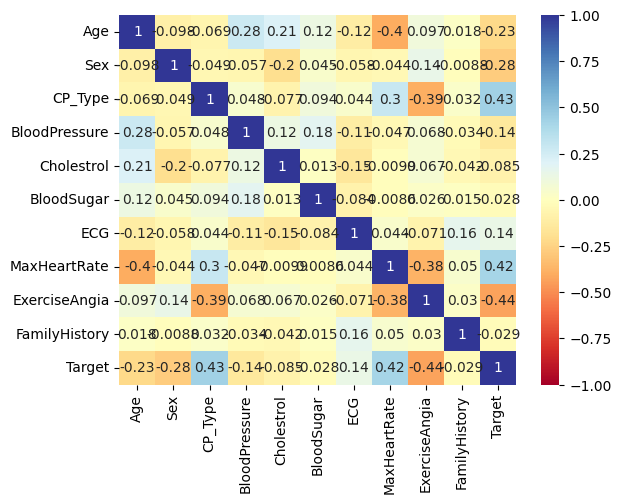

---------------------------------------------------------------------------------------------------------------------------------------


In [15]:
# Generate corrleated analysis of HAA_Data in visualization format
corr = HAA_data.corr()
print("--------------------------------------------Data Corrleation Details -------------------------------------------------------------------")
print(corr)
print("")
print("")
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='RdYlBu')
plt.show()
print("---------------------------------------------------------------------------------------------------------------------------------------")


## 3. Correlation Analysis:

---
* Positive Correlation – values towards 1:

Chest Pain Type and Target (heart attacks and improving patient) - 0.433798 - A good positive correlation suggests that certain chest pain types are strongly associated with heart disease. This will help in predictions

MaxHeartRate and Target (heart attacks and improving patient) - 0.421741 -  A good positive correlation indicates that a higher maximum heart rate may be linked to a higher risk of heart disease.

Age and BloodPressure (0.279351 ), Age and Cholestrol (0.213678) -   A slight positive correlation is visible.

---
* Negative Correlation value towards -1

Exercise Include Angia and Target (heart attacks and improving patient) - -0.436757-  A negative correlation is quite important and shows that exercise-induced angina will help in predicting the target

Age and Sex with Target (heart attacks and improving patient)   -   A slight Negetively correlation is visible.

---
* Low Correlation Near 0
Many attribute pairs show weak or no linear correlation. Attributes like family History


### Analyze HAA Data

In [16]:
# Set the color coding for the visualizations to be plotted
from matplotlib import cm
va_cmap = cm.get_cmap('viridis')

<ipython-input-16-d44663bf4ad4>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  va_cmap = cm.get_cmap('viridis')


In [17]:
# columns of HAA Data
HAA_data.columns

Index(['Age', 'Sex', 'CP_Type', 'BloodPressure', 'Cholestrol', 'BloodSugar',
       'ECG', 'MaxHeartRate', 'ExerciseAngia', 'FamilyHistory', 'Target'],
      dtype='object')

In [18]:
# analyze target variables
HAA_data['Target'].value_counts()

,count
Target,
1,165
0,138


In [19]:
# % of heart attack cases
print("Number of Heart Attack Cases: ", (165 / (165 + 138))*100)

Number of Heart Attack Cases:  54.45544554455446


<Axes: ylabel='Target'>

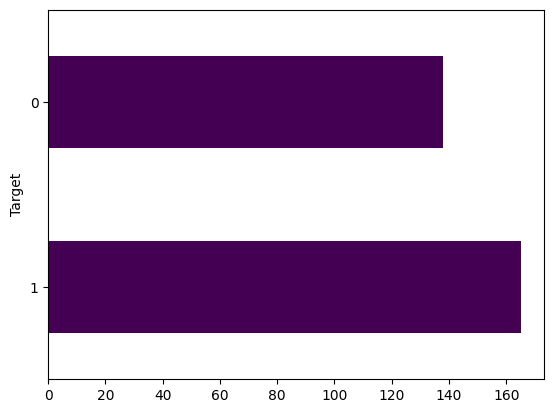

In [20]:
HAA_data['Target'].value_counts().plot.barh(cmap=va_cmap)

**Inferances  >>>>**


54.5% of cases are higher chance of Heart Attack

---------------------------------------------------------------------------------------------------------------------------------


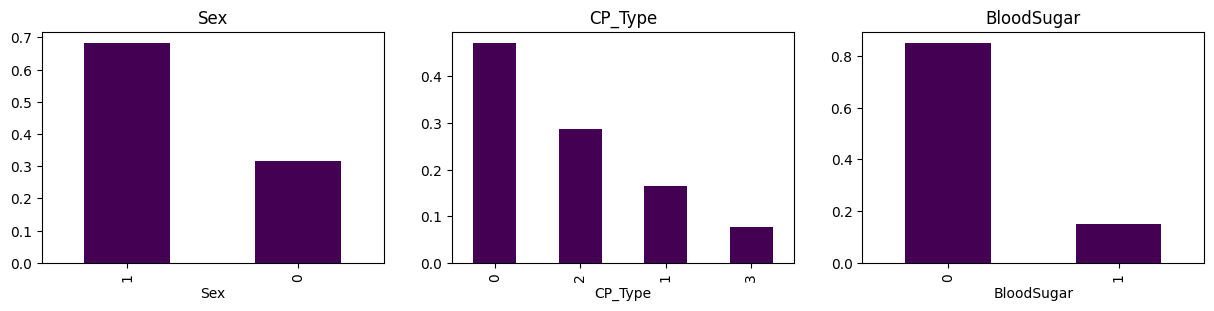

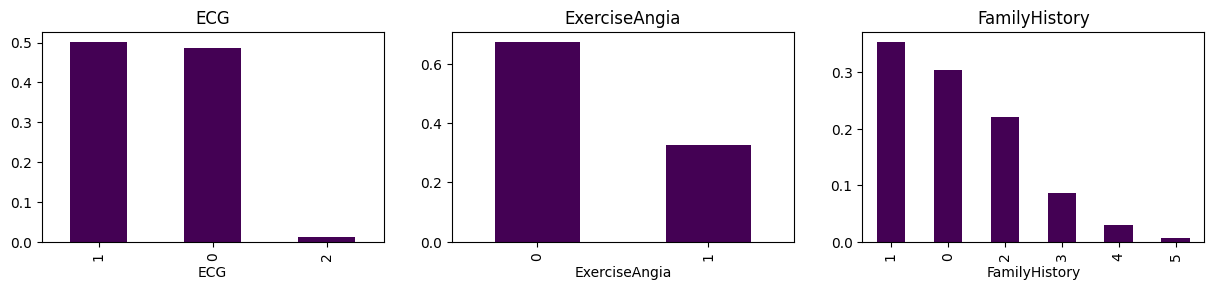

--------------------------------------Categorical Attribute Analysis------------------------------------------------------------
Sex
1    68.316832
0    31.683168
Name: proportion, dtype: float64
CP_Type
0    47.194719
2    28.712871
1    16.501650
3     7.590759
Name: proportion, dtype: float64
BloodSugar
0    85.148515
1    14.851485
Name: proportion, dtype: float64
ECG
1    50.165017
0    48.514851
2     1.320132
Name: proportion, dtype: float64
ExerciseAngia
0    67.326733
1    32.673267
Name: proportion, dtype: float64
FamilyHistory
1    35.313531
0    30.363036
2    22.112211
3     8.580858
4     2.970297
5     0.660066
Name: proportion, dtype: float64
---------------------------------------------------------------------------------------------------------------------------------


In [21]:
#Prepare a layout two render these categorical attributes
print("---------------------------------------------------------------------------------------------------------------------------------")
plt.figure(1)

plt.subplot(131)
HAA_data['Sex'].value_counts(normalize=True).plot.bar(figsize=(15,3), title= 'Sex', cmap=va_cmap)

plt.subplot(132)
HAA_data['CP_Type'].value_counts(normalize=True).plot.bar(figsize=(15,3),title= 'CP_Type', cmap=va_cmap)

plt.subplot(133)
HAA_data['BloodSugar'].value_counts(normalize=True).plot.bar(figsize=(15,3),title= 'BloodSugar', cmap=va_cmap)

plt.figure(2)
plt.subplot(231)
HAA_data['ECG'].value_counts(normalize=True).plot.bar(figsize=(15,6),title= 'ECG', cmap=va_cmap)

plt.subplot(232)
HAA_data['ExerciseAngia'].value_counts(normalize=True).plot.bar(figsize=(15,6),title= 'ExerciseAngia', cmap=va_cmap)

plt.subplot(233)
HAA_data['FamilyHistory'].value_counts(normalize=True).plot.bar(figsize=(15,6),title= 'FamilyHistory', cmap=va_cmap)

plt.show()

print("--------------------------------------Categorical Attribute Analysis------------------------------------------------------------")
print(HAA_data['Sex'].value_counts(normalize=True)*100)
print(HAA_data['CP_Type'].value_counts(normalize=True)*100)
print(HAA_data['BloodSugar'].value_counts(normalize=True)*100)
print(HAA_data['ECG'].value_counts(normalize=True)*100)
print(HAA_data['ExerciseAngia'].value_counts(normalize=True)*100)
print(HAA_data['FamilyHistory'].value_counts(normalize=True)*100)
print("---------------------------------------------------------------------------------------------------------------------------------")

**Inferances  >>>>**

1. 68% of people are of with sex category 1
2. more than 75% are of Chest Pain Type - 0: typical angina, 1: atypical angina
3. 85% are of with BloodSugar category 0
4. 98% are of belong to ECG category 0  and 1 and very small amount portion on category 2
5. 67% are of NO Exercise Include Angia
6. Family history around 90% are with family members 0 - 2, and with in 0 -2 it is almost equally distributed


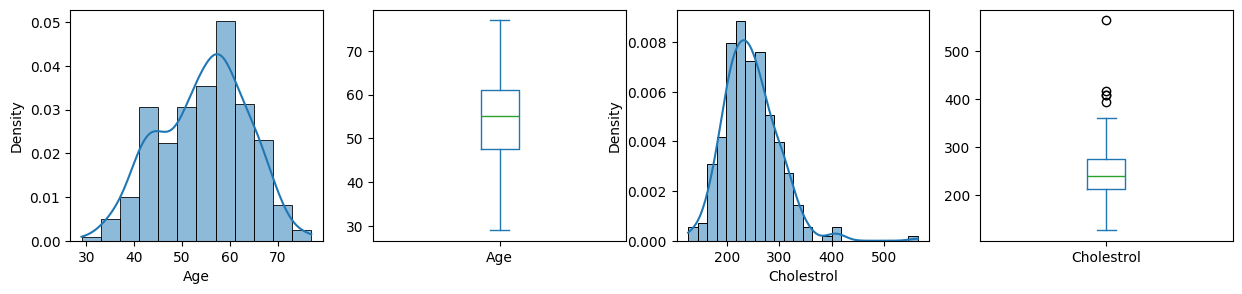

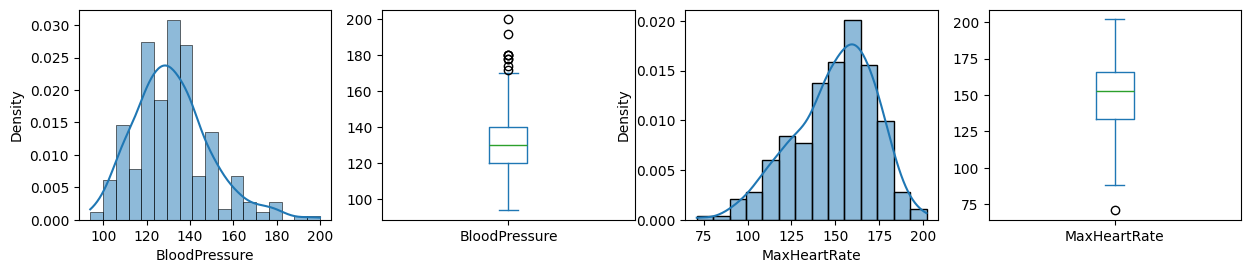

In [22]:
#Prepare a layout to render these numerical attributes
plt.figure(1)
plt.subplot(141)
sns.histplot(HAA_data['Age'], kde=True, stat="density")

plt.subplot(142)
HAA_data['Age'].plot.box(figsize=(15,3))

plt.subplot(143)
sns.histplot(HAA_data['Cholestrol'], kde=True, stat="density")

plt.subplot(144)
HAA_data['Cholestrol'].plot.box(figsize=(15,3))

plt.figure(2)
plt.subplot(241)
sns.histplot(HAA_data['BloodPressure'], kde=True, stat="density")

plt.subplot(242)
HAA_data['BloodPressure'].plot.box(figsize=(15,6))

plt.subplot(243)
sns.histplot(HAA_data['MaxHeartRate'], kde=True, stat="density")

plt.subplot(244)
HAA_data['MaxHeartRate'].plot.box(figsize=(15,6))

plt.show()

**Inferances  >>>>**

1. Both Blood Presure and Cholestrol are normally distributed and is slightly right side skewed and have good number of outliers. Need to be normalized
2. Max Heart Rate is normal distributed and left side Skewed and one outlier. needs to be normalized
3. Age is has no outliers and is not in normally distributed. Need noramlization

### Bivariate Analysis

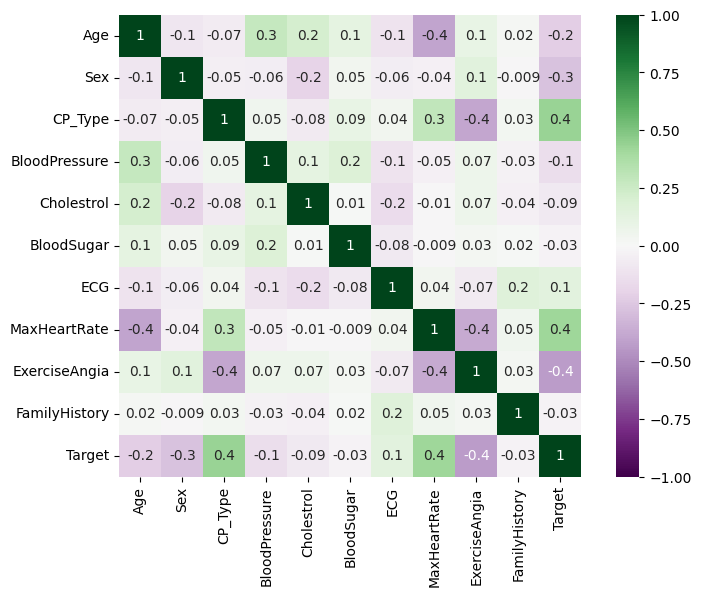

In [23]:
HAA_data_copy = HAA_data.copy()
matrix = HAA_data.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmin=-1, vmax=1, square=True, cmap="PRGn", annot=True, fmt='.1g');

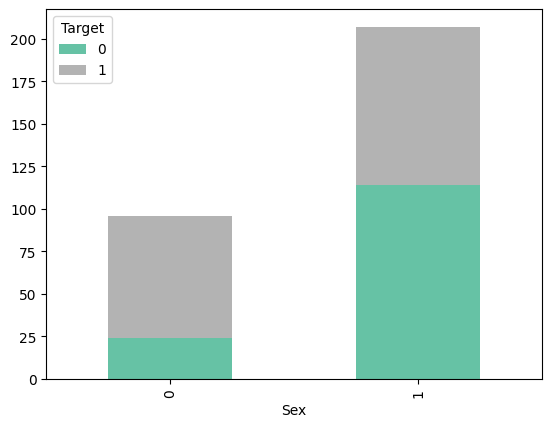

In [24]:
# Attribute sex and target are negetively correlated. Checking relationship between 'Gender' and Heart Attack chances.
HAA_data.groupby(['Sex', 'Target']).size().unstack().plot(kind='bar', stacked=True, cmap='Set2')
plt.show()

**Inferances  >>>>**

1. For Sex Category 0, changes are Heart Attacks seems more (0=LESS CHANCE , 1= MORE CHANCE)
2. For Sex Category 1, there is almost equal changces of Heart Attacks.

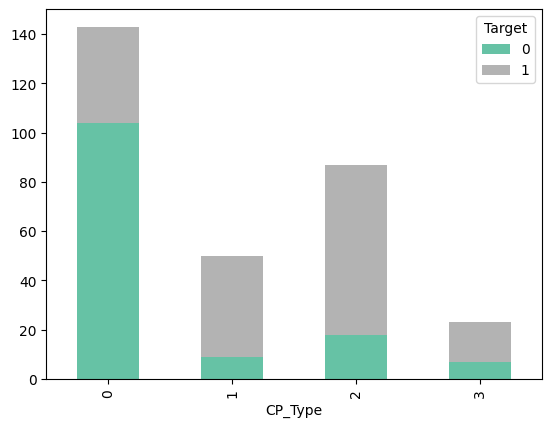

In [25]:
# Attribute CP Type and target are positively correlated. Checking relationship between cp type and Heart Attack chances.
HAA_data.groupby(['CP_Type', 'Target']).size().unstack().plot(kind='bar', stacked=True, cmap='Set2')
plt.show()

**Inferances  >>>>**

1. For Chest Pain Type 1- typical angina,Heart Attacks chances are less (0=LESS CHANCE , 1= MORE CHANCE)
2. For For Chest Pain Type 2: atypical angina, Type 3: non-anginal pain, Type 4: asymptomatic - the Heart Attacks seems more. and for Type 3: non-anginal pain, it seems higher side

Chest Pain Type(Value 1: typical angina, Value2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

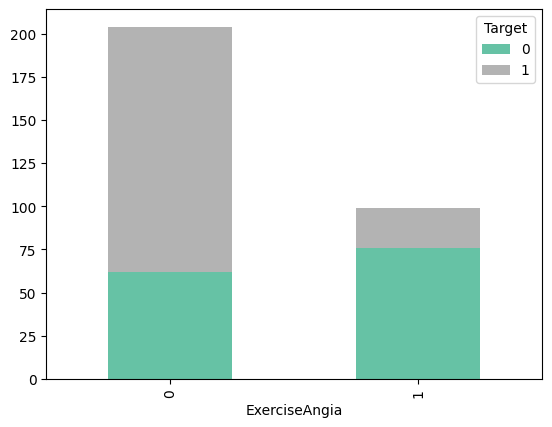

In [26]:
# Attribute ExerciseAngia and target are negetively correlated. Checking relationship between ExerciseAngia and Heart Attack chances.
HAA_data.groupby(['ExerciseAngia', 'Target']).size().unstack().plot(kind='bar', stacked=True, cmap='Set2')
plt.show()

**Inferances  >>>>**

1. For Exercise Include Angia Type 1 (YES) Heart Attacks chances are less (0=LESS CHANCE , 1= MORE CHANCE)
2. For Exercise Include Angia Type 0 (NO) Heart Attacks chances are more

Exercise Include Angia(1=YES, 0=NO)

## 4. Data Pre-processing and cleaning [2M]

a.     Do the appropriate pre-processing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc. Mention the pre-processing steps performed in the markdown cell.

b.     Apply appropriate feature engineering techniques. Apply the feature transformation techniques like Standardization, Normalization, etc. You are free to apply the appropriate transformations

depending upon the structure and the complexity of your dataset. Provide proper justification. Techniques used without justification will not be awarded marks.

Explore a few techniques for identifying feature importance for your feature engineering task

### a. Pre-Processing

---> Handling missing data

In [27]:
HAA_data.isnull().sum()

,0
Age,0
Sex,0
CP_Type,0
BloodPressure,0
Cholestrol,0
BloodSugar,0
ECG,0
MaxHeartRate,0
ExerciseAngia,0
FamilyHistory,0


**Inferances  >>>>**

No of the columns have missing values in the given data set

Typical Methods to fill the missing values are
- For numerical variables: imputation using mean or median
- For categorical variables: imputation using mode

---> Handling of outliers

During analysis of HAA Data, we observed that Cholestrol and BloodPressure has outliers present in it. Noramlizaing the attribute data as they affect the distribution of data.

Remove the skewness is by doing the log transformation. With log transformation, it does not affect the smaller values much, but reduces the larger values, so it gives a distribution similar to normal distribution.

array([[<Axes: title={'center': 'Cholestrol'}>,
        <Axes: title={'center': 'Cholestrol_log'}>]], dtype=object)

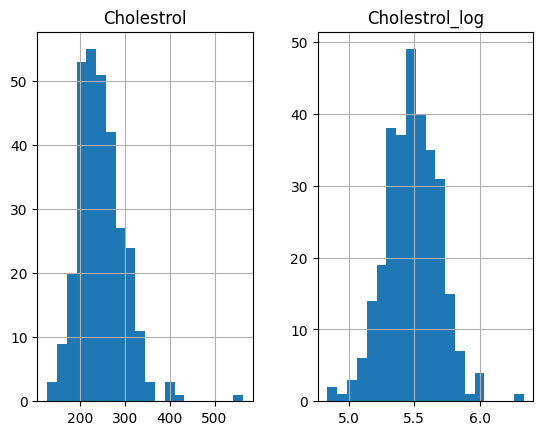

In [28]:
# Handling outliers for Cholestrol
HAA_data['Cholestrol_log'] = np.log(HAA_data['Cholestrol'])
tmpDf = pd.DataFrame({'Cholestrol': HAA_data['Cholestrol'], 'Cholestrol_log': HAA_data['Cholestrol_log']})
tmpDf.hist(bins=20)

**Inferances  >>>>**

Cholestrol graph - before normalization and cholestrol_log is after noramliation

Cholestrol_log is normally distributed

array([[<Axes: title={'center': 'BloodPressure'}>,
        <Axes: title={'center': 'BloodPressure_log'}>]], dtype=object)

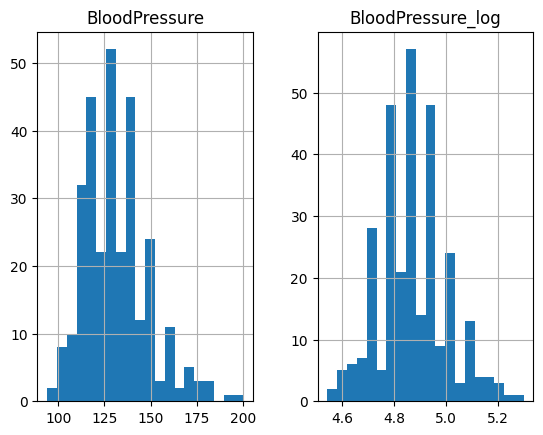

In [29]:
# Handling outliers for Cholestrol
HAA_data['BloodPressure_log'] = np.log(HAA_data['BloodPressure'])
tmp1Df = pd.DataFrame({'BloodPressure': HAA_data['BloodPressure'], 'BloodPressure_log': HAA_data['BloodPressure_log']})
tmp1Df.hist(bins=20)

**Inferances  >>>>**

BloodPressure graph - before normalization and BloodPressure_log is after noramliation

BloodPressure_log is normally distributed

In [30]:
HAA_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                303 non-null    int64  
 1   Sex                303 non-null    int64  
 2   CP_Type            303 non-null    int64  
 3   BloodPressure      303 non-null    int64  
 4   Cholestrol         303 non-null    int64  
 5   BloodSugar         303 non-null    int64  
 6   ECG                303 non-null    int64  
 7   MaxHeartRate       303 non-null    int64  
 8   ExerciseAngia      303 non-null    int64  
 9   FamilyHistory      303 non-null    int64  
 10  Target             303 non-null    int64  
 11  Cholestrol_log     303 non-null    float64
 12  BloodPressure_log  303 non-null    float64
dtypes: float64(2), int64(11)
memory usage: 30.9 KB


**Inferances  >>>>**

There is no object Dtypes. Nothing to change

All are numical data, nothing to covert

### b. Feature engineering techniques


**Inferances  >>>>**

Looking at the dataset structure, not much for create new feature from existing features

Normalization of data for outliers are done earlier

In [31]:
HAA_data_tmp = HAA_data[['Age', 'Sex','CP_Type','BloodPressure_log','Cholestrol_log','BloodSugar','ECG','MaxHeartRate','ExerciseAngia','FamilyHistory','Target']].copy()
HAA_data = HAA_data_tmp.copy()

In [32]:
HAA_data.head(5)

,Age,Sex,CP_Type,BloodPressure_log,Cholestrol_log,BloodSugar,ECG,MaxHeartRate,ExerciseAngia,FamilyHistory,Target
0,63,1,3,4.976734,5.451038,1,0,150,0,2,1
1,37,1,2,4.867534,5.521461,0,1,187,0,1,1
2,41,0,1,4.867534,5.318120,0,0,172,0,0,1
3,56,1,1,4.787492,5.463832,0,1,178,0,1,1
4,57,0,0,4.787492,5.869297,0,1,163,1,0,1


In [33]:
HAA_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                303 non-null    int64  
 1   Sex                303 non-null    int64  
 2   CP_Type            303 non-null    int64  
 3   BloodPressure_log  303 non-null    float64
 4   Cholestrol_log     303 non-null    float64
 5   BloodSugar         303 non-null    int64  
 6   ECG                303 non-null    int64  
 7   MaxHeartRate       303 non-null    int64  
 8   ExerciseAngia      303 non-null    int64  
 9   FamilyHistory      303 non-null    int64  
 10  Target             303 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 26.2 KB


## Model Building [5M]

a.     Split the dataset into training and test sets. Answer without justification will not be awarded marks. [1M]

i.     Train = 80 % Test = 20%

ii.     Also, try to split the dataset with different ratios of your choice.

b.     Build model using Logistic regression and decision tree  [4 M]

i.     Tune hyperparameters (e.g., number of trees, maximum depth) using cross-validation. Justify your answer.

In [34]:
HAA_data.columns

Index(['Age', 'Sex', 'CP_Type', 'BloodPressure_log', 'Cholestrol_log',
       'BloodSugar', 'ECG', 'MaxHeartRate', 'ExerciseAngia', 'FamilyHistory',
       'Target'],
      dtype='object')

In [35]:
# drop column Target from HAA_DATA and get the target
X=HAA_data.drop('Target', axis=1, inplace=False)
y=HAA_data['Target']

In [36]:
# Feature Columns
X.columns

Index(['Age', 'Sex', 'CP_Type', 'BloodPressure_log', 'Cholestrol_log',
       'BloodSugar', 'ECG', 'MaxHeartRate', 'ExerciseAngia', 'FamilyHistory'],
      dtype='object')

In [37]:
# add hot encode columns of Sex and CP_Type columns of HAA_DATA and add to HAA_DATA and get_dummies to provide values as 0 or 1
X = pd.get_dummies(X, columns=['Sex', 'CP_Type','BloodSugar','ECG','ExerciseAngia','FamilyHistory'], dtype=int)
X.columns



Index(['Age', 'BloodPressure_log', 'Cholestrol_log', 'MaxHeartRate', 'Sex_0',
       'Sex_1', 'CP_Type_0', 'CP_Type_1', 'CP_Type_2', 'CP_Type_3',
       'BloodSugar_0', 'BloodSugar_1', 'ECG_0', 'ECG_1', 'ECG_2',
       'ExerciseAngia_0', 'ExerciseAngia_1', 'FamilyHistory_0',
       'FamilyHistory_1', 'FamilyHistory_2', 'FamilyHistory_3',
       'FamilyHistory_4', 'FamilyHistory_5'],
      dtype='object')

In [38]:
X.head(4)

,Age,BloodPressure_log,Cholestrol_log,MaxHeartRate,Sex_0,Sex_1,CP_Type_0,CP_Type_1,CP_Type_2,CP_Type_3,...,ECG_1,ECG_2,ExerciseAngia_0,ExerciseAngia_1,FamilyHistory_0,FamilyHistory_1,FamilyHistory_2,FamilyHistory_3,FamilyHistory_4,FamilyHistory_5
0,63,4.976734,5.451038,150,0,1,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
1,37,4.867534,5.521461,187,0,1,0,0,1,0,...,1,0,1,0,0,1,0,0,0,0
2,41,4.867534,5.318120,172,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
3,56,4.787492,5.463832,178,0,1,0,1,0,0,...,1,0,1,0,0,1,0,0,0,0


i. Train = 70 % Test = 30%

In [39]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
scaler = MinMaxScaler()

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, shuffle=True)

In [41]:
X_train =scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model_LR = LogisticRegression(random_state=100)
model_LR.fit(X_train, y_train)

LogisticRegression(random_state=100)

In [42]:
print(" Classes -->", model_LR.classes_)
print(" Coefficients -->", model_LR.coef_)


 Classes --> [0 1]
 Coefficients --> [[-0.76032237 -0.73294752 -0.63919814  1.9085654   0.83498059 -0.82339765
  -1.32248886  0.54501727  0.5508131   0.23824144  0.04311284 -0.0315299
  -0.30938138  0.41557845 -0.09461413  0.73712294 -0.72554    -0.20784754
   0.25782506 -0.28994649 -0.05441769  0.32194296 -0.01597337]]


In [43]:
predicted=model_LR.predict(X_test)
print(predicted)

[1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0
 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1
 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1]


In [44]:
actual = y_test
accuracy_score(actual,predicted)

0.7582417582417582

ii. Also, try to split the dataset with different ratios of your choice.

with Train = 90 % Test = 10%

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.1, shuffle=True)

In [46]:
X_train =scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model_LR = LogisticRegression(random_state=100)
model_LR.fit(X_train, y_train)
predicted=model_LR.predict(X_test)
print(predicted)
actual = y_test
accuracy_score(actual,predicted)

[0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0]


0.7741935483870968

with Train = 80 % Test = 20%

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, shuffle=True)

In [48]:
X_train =scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model_LR = LogisticRegression(random_state=100)
model_LR.fit(X_train, y_train)
ylr_predicted=model_LR.predict(X_test)
print(ylr_predicted)

# variables for accuracy calcuation
ylr_predicted = ylr_predicted
ylr_test = y_test

actual = y_test
accuracy_score(actual,ylr_predicted)



[0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1 0 0]


0.819672131147541

with Cross Validation

In [49]:
logistic_model = LogisticRegression(solver='liblinear')
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(logistic_model, X, y, cv=cv, scoring='accuracy')
print("Cross-validation scores:", cross_val_scores)
print("Mean cross-validation score:", cross_val_scores.mean())
print("Standard deviation of cross-validation scores:", cross_val_scores.std())

Cross-validation scores: [0.83606557 0.73770492 0.7704918  0.68333333 0.8       ]
Mean cross-validation score: 0.7655191256830601
Standard deviation of cross-validation scores: 0.0523805195950714


Decision Tree

i.     Tune hyperparameters (e.g., number of trees, maximum depth) using cross-validation. Justify your answer.

In [50]:
HAA_data.columns
# drop columns BloodPrssure and Cholestrol from HAA_Data
HAA_Data_Deci = HAA_data.copy()
HAA_Data_Deci = pd.get_dummies(HAA_data, columns=['Sex', 'CP_Type','BloodSugar','ECG','ExerciseAngia','FamilyHistory','Target'], dtype=int)
HAA_Data_Deci.columns


Index(['Age', 'BloodPressure_log', 'Cholestrol_log', 'MaxHeartRate', 'Sex_0',
       'Sex_1', 'CP_Type_0', 'CP_Type_1', 'CP_Type_2', 'CP_Type_3',
       'BloodSugar_0', 'BloodSugar_1', 'ECG_0', 'ECG_1', 'ECG_2',
       'ExerciseAngia_0', 'ExerciseAngia_1', 'FamilyHistory_0',
       'FamilyHistory_1', 'FamilyHistory_2', 'FamilyHistory_3',
       'FamilyHistory_4', 'FamilyHistory_5', 'Target_0', 'Target_1'],
      dtype='object')

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
from pydot import graph_from_dot_data
from sklearn import tree
import pydotplus
import os

In [52]:
feature_names = HAA_Data_Deci.columns[0: HAA_Data_Deci.columns.size - 2]
feature_names

Index(['Age', 'BloodPressure_log', 'Cholestrol_log', 'MaxHeartRate', 'Sex_0',
       'Sex_1', 'CP_Type_0', 'CP_Type_1', 'CP_Type_2', 'CP_Type_3',
       'BloodSugar_0', 'BloodSugar_1', 'ECG_0', 'ECG_1', 'ECG_2',
       'ExerciseAngia_0', 'ExerciseAngia_1', 'FamilyHistory_0',
       'FamilyHistory_1', 'FamilyHistory_2', 'FamilyHistory_3',
       'FamilyHistory_4', 'FamilyHistory_5'],
      dtype='object')

In [53]:
target_names = HAA_Data_Deci.columns[HAA_Data_Deci.columns.size - 2:]
target_names

Index(['Target_0', 'Target_1'], dtype='object')

In [54]:
dt = DecisionTreeClassifier(random_state=100)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

In [55]:

os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
dot_data = StringIO()
feature_names = X.columns
export_graphviz(dt, out_file=dot_data, feature_names=feature_names, class_names=target_names,
                filled=True, rounded=True,
                special_characters=True)

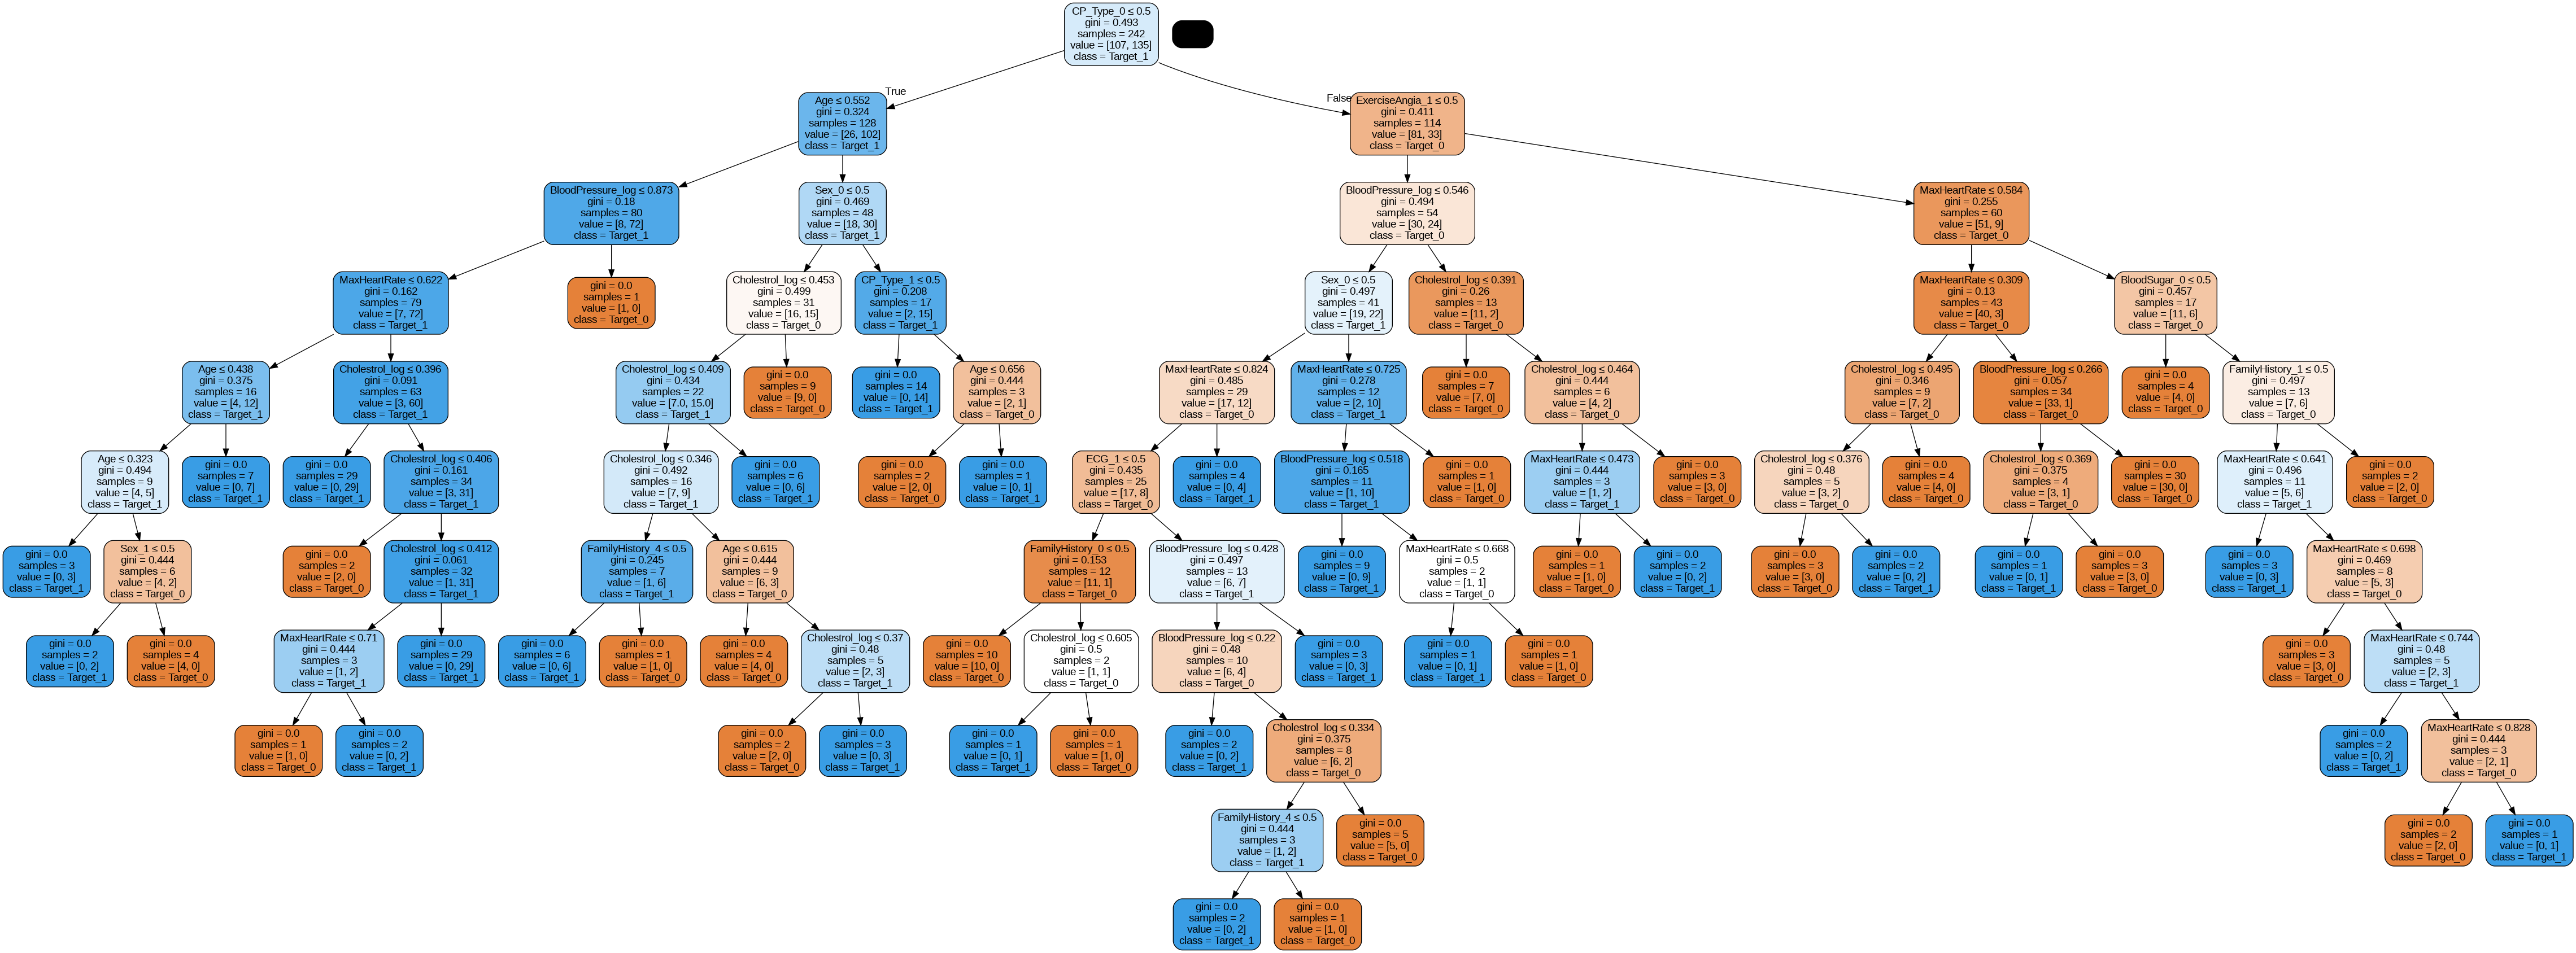

In [56]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [57]:
y_pred = dt.predict(X_test)

In [58]:
actuals = np.array(y_test)
predictions = np.array(y_pred)
cfmtx=confusion_matrix(actuals, predictions)

# variables for accuracy metrics calculation
ydec_predicted = y_pred
ydec_test = y_test

In [59]:
cfmtx
TP=cfmtx[0][0]
TN=cfmtx[1][1]
FP=cfmtx[0][1]
FN=cfmtx[1][0]

In [60]:
accuracy = (( TP + TN ) / ( TP + TN + FP + FN)) * 100
accuracy

73.77049180327869

with depth parameter decision tree

In [61]:
for i in range(1,10):
  dt = DecisionTreeClassifier(max_depth=i, random_state=100)
  dt.fit(X_train, y_train)
  y_pred = dt.predict(X_test)
  actuals = np.array(y_test)
  predictions = np.array(y_pred)
  cfmtx=confusion_matrix(actuals, predictions)
  TP=cfmtx[0][0]
  TN=cfmtx[1][1]
  FP=cfmtx[0][1]
  FN=cfmtx[1][0]
  accuracy = (( TP + TN ) / ( TP + TN + FP + FN)) * 100
  print("Accuracy at depth ",i," is ",accuracy)


Accuracy at depth  1  is  77.04918032786885
Accuracy at depth  2  is  77.04918032786885
Accuracy at depth  3  is  80.32786885245902
Accuracy at depth  4  is  78.68852459016394
Accuracy at depth  5  is  81.9672131147541
Accuracy at depth  6  is  72.1311475409836
Accuracy at depth  7  is  73.77049180327869
Accuracy at depth  8  is  73.77049180327869
Accuracy at depth  9  is  73.77049180327869


**Inferances  >>>>**

For the given data set, as depth inceases the accuracy getting decreased

## Performance Evaluation [2M]

a.     Compare the performance of the Logistic Regression and Decision Tree models using appropriate evaluation metrics.

b.     Provide insights into which model performs better and why. Answer without justification will not be awarded marks.

In [62]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_auc_score

In [63]:
# logistic regression
# evaluate the model
print("Confusion Matrix:\n", confusion_matrix(ylr_test, ylr_predicted))
print("\nClassification Report:\n", classification_report(ylr_test, ylr_predicted))

Confusion Matrix:
 [[22  9]
 [ 2 28]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.71      0.80        31
           1       0.76      0.93      0.84        30

    accuracy                           0.82        61
   macro avg       0.84      0.82      0.82        61
weighted avg       0.84      0.82      0.82        61



In [64]:
# Decision Tree
# evaluate the model
print("Confusion Matrix:\n", confusion_matrix(ydec_test, ydec_predicted))
print("\nClassification Report:\n", classification_report(ydec_test, ydec_predicted))

Confusion Matrix:
 [[22  9]
 [ 7 23]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.71      0.73        31
           1       0.72      0.77      0.74        30

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



**Inferances  >>>>**

Linear regress accuracy is observed more compared with descision tree.